<a href="https://colab.research.google.com/github/swapnil-mergal/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/Heart_disease_cleveland_new.csv')

In [43]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [44]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
df.shape

(303, 14)

In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [48]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [49]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [69]:
# Basic statistics of the dataset
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    0.600660    0.663366   
std  

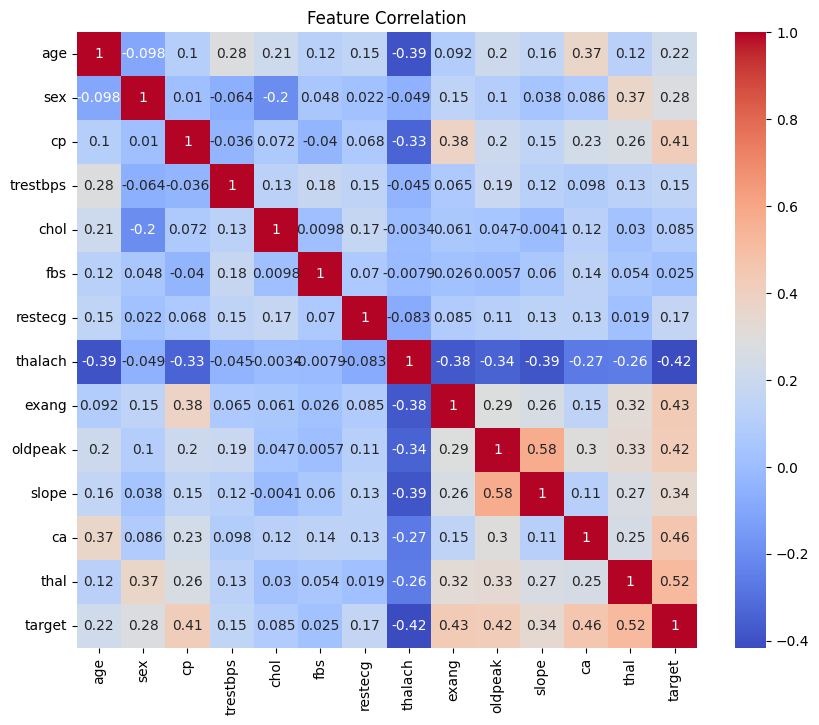

In [71]:
# STEP 2
#EDA
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


Understand relationships between features and the target variable.

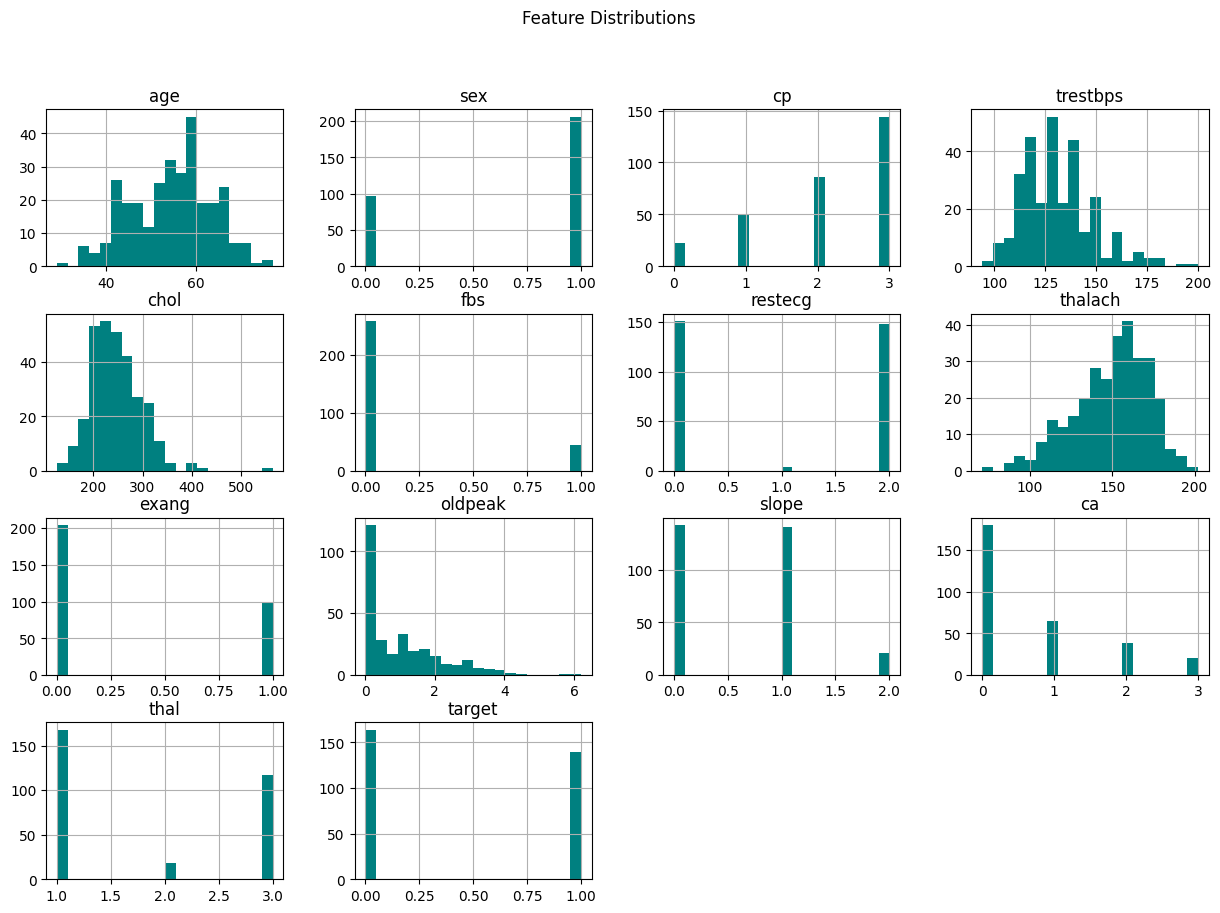

In [73]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10), color='teal')
plt.suptitle("Feature Distributions")
plt.show()

Visualize the distribution of numerical features to detect skewness or outliers

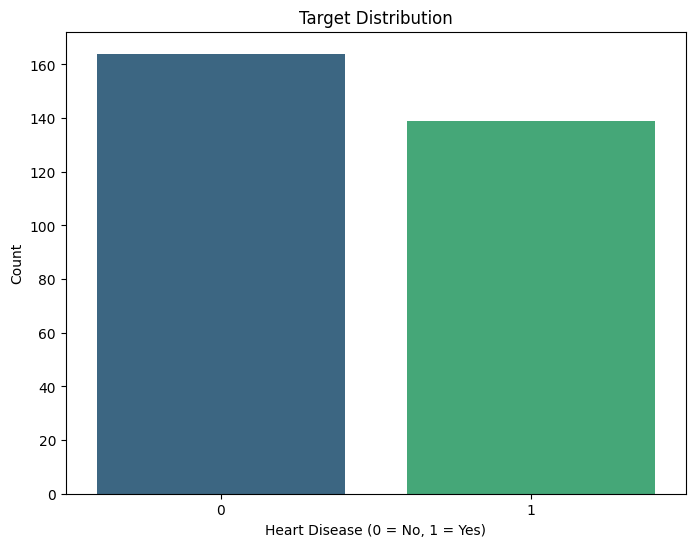

In [76]:
# Countplot for the target variable
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Target Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Analyze categorical features (if any)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"{col} Distribution")
    plt.show()


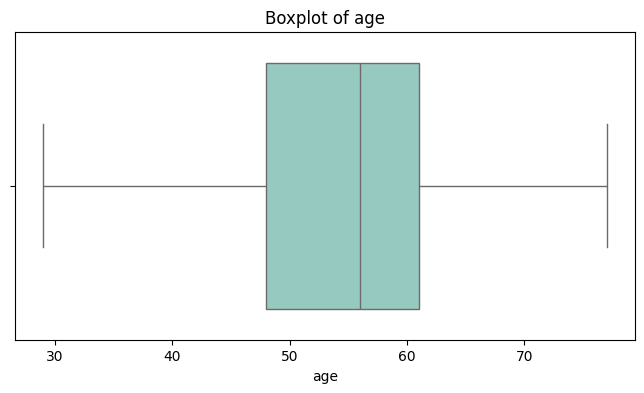

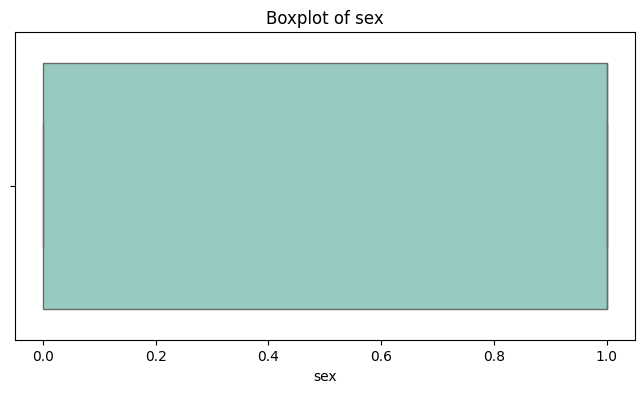

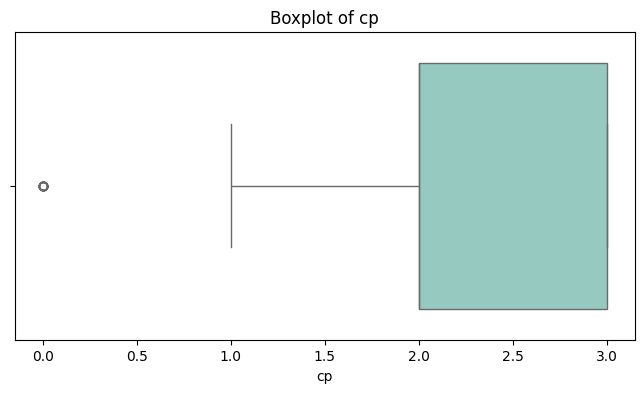

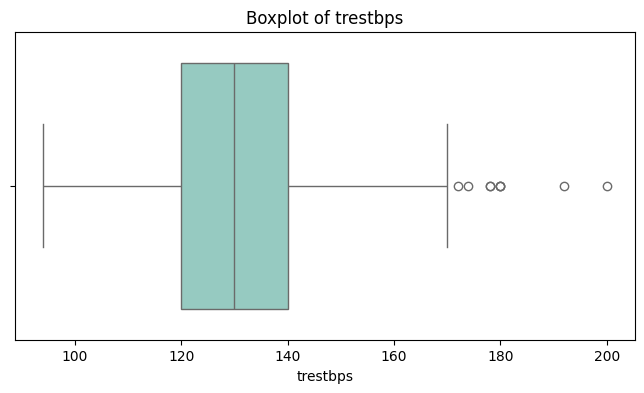

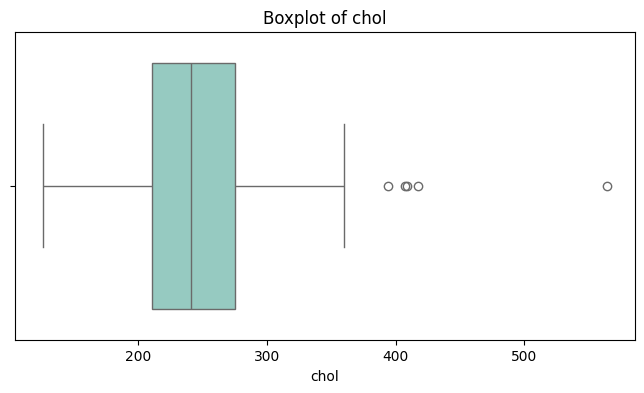

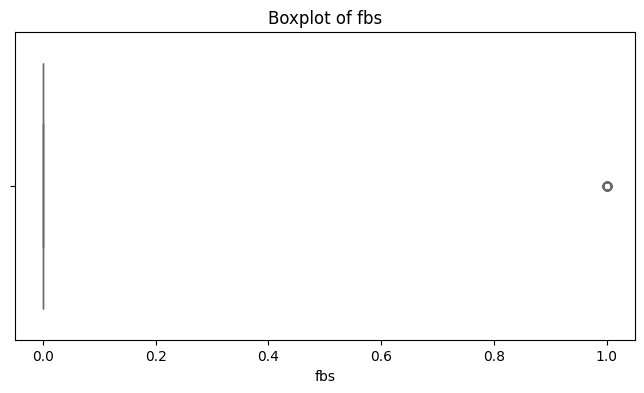

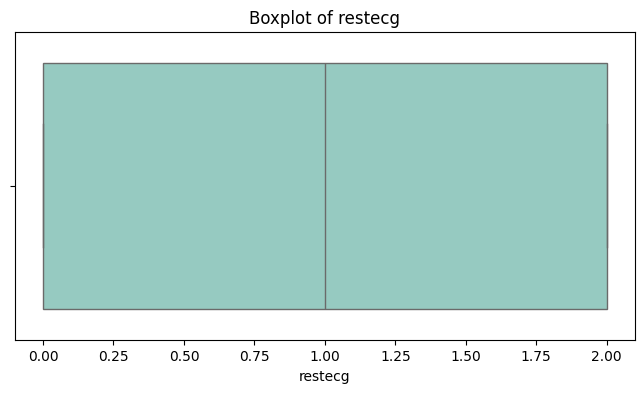

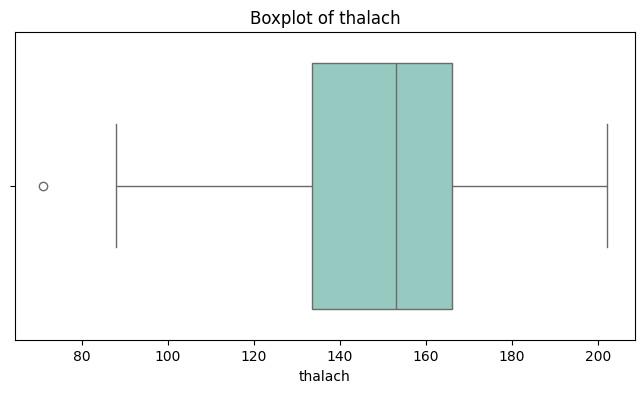

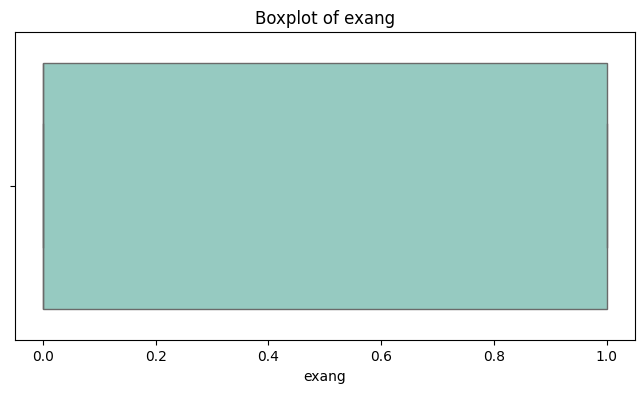

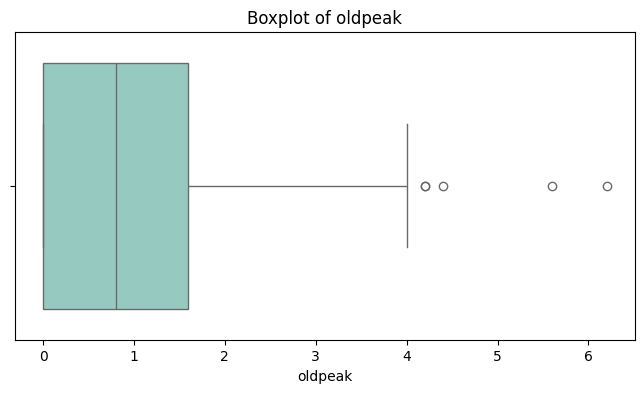

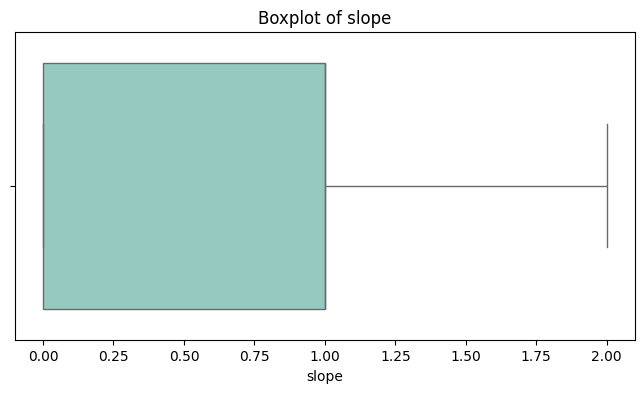

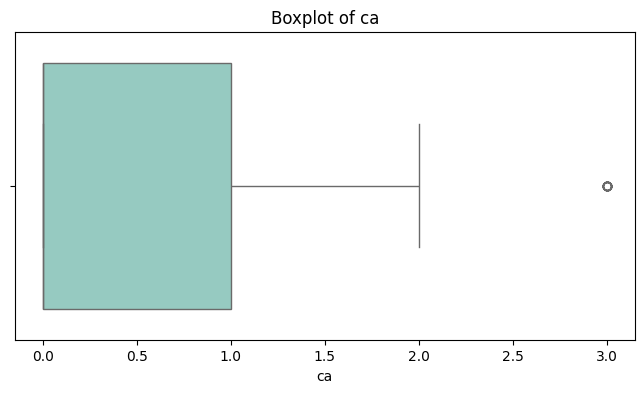

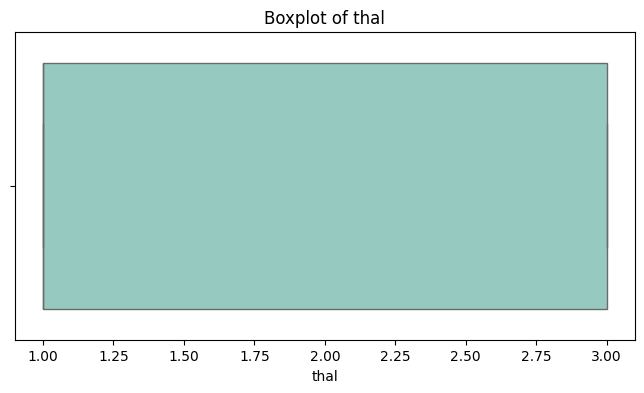

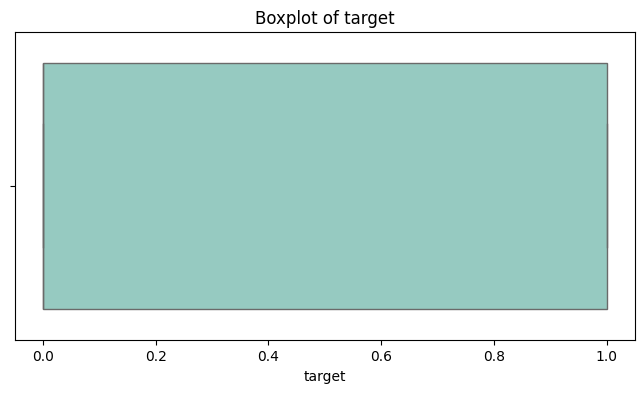

In [78]:
# Boxplots for detecting outliers in numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], palette='Set3')
    plt.title(f"Boxplot of {col}")
    plt.show()


In [81]:
from sklearn.utils import resample

# Check class distribution
print("\nClass Distribution:")
print(df['target'].value_counts())

# If imbalanced, apply resampling (example: oversampling the minority class)
majority = df[df['target'] == 0]
minority = df[df['target'] == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced_data = pd.concat([majority, minority_upsampled])

print("\nBalanced Class Distribution:")
print(balanced_data['target'].value_counts())



Class Distribution:
target
0    164
1    139
Name: count, dtype: int64

Balanced Class Distribution:
target
0    164
1    164
Name: count, dtype: int64


In [50]:
# Step 3: Preprocessing
# Separate features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

In [51]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
# Step 4: Initialize Models
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(random_state=42)

In [54]:
# Train and evaluate each model
models = {
    "Decision Tree": decision_tree,
    "SVM": svm,
    "Naive Bayes": naive_bayes,
    "Random Forest": random_forest
}

In [55]:
# Dictionary to store accuracy scores
accuracy_scores = {}


In [56]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy


In [58]:
# Step 5: Train and Evaluate Models
accuracy_scores = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    # Print detailed report for each model
    print(f"\nModel: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Confusion Matrix:
[[22  7]
 [ 8 24]]

Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
[[27  2]
 [ 4 28]]

Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0

In [63]:
# Step 6: Display Accuracy Scores
print("\nModel Accuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


Model Accuracy Scores:
Decision Tree: 75.41%
SVM: 90.16%
Naive Bayes: 85.25%
Random Forest: 86.89%


Support Vector Machine (SVM) outperformed other models with the highest accuracy.

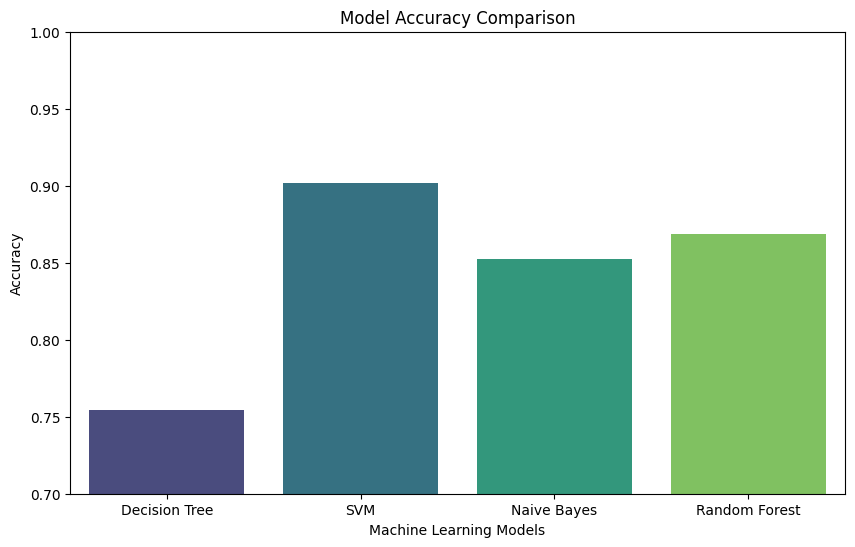

In [64]:
# Step 7: Visualize Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)  # Set y-axis range to focus on accuracy
plt.show()

Support Vector Machine (SVM) outperformed other models with the highest accuracy.

In [82]:
# Additional steps such as hyperparameter tuning, feature importance analysis,
# or saving the trained models for future use

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8264455782312925


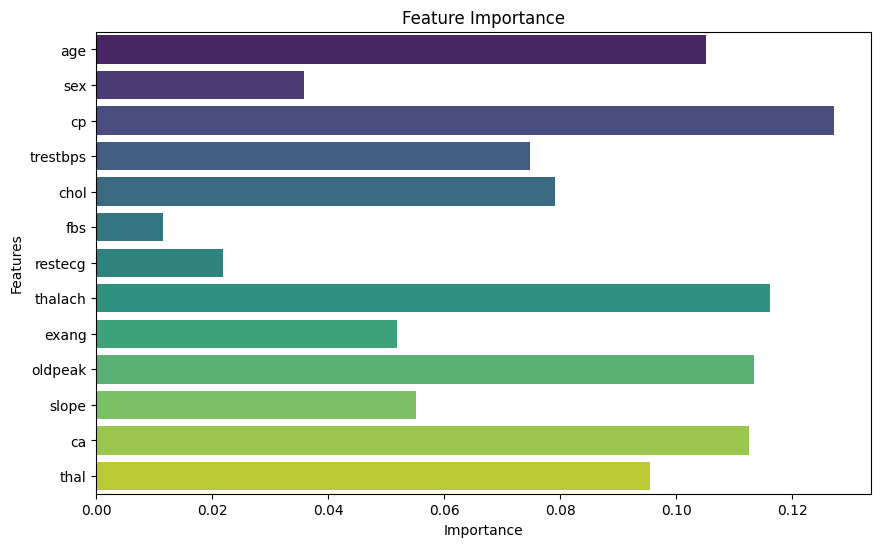

In [67]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = rf.feature_importances_
features = df.columns[:-1]  # Exclude the target column
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
